<a href="https://colab.research.google.com/github/jramon-mm/08MBID-Visualizacion-de-Datos/blob/main/08MBID_VD_Trabajo_Practico/MBID08_VD_Trabajo_Practico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargando y limpiando los datos

In [1]:
# Importacion de Pandas para lectura y trabajo con el conjunto de datos
import pandas as pd

# Lectura del conjunto de datos
spain_ufo_sightings = pd.read_csv('UFO_sightings_Spain.csv')

In [2]:
# Mostramos conjunto de datos
spain_ufo_sightings

,longitude,latitude,year,Cow incidents,Crop circle found,Alien sighted,Abduction event
0,-5.589385,42.482207,1915,Yes,No,No,No
1,-8.021037,43.018699,1599,Yes,No,No,No
2,-7.536301,42.233816,1923,Yes,No,No,No
3,-4.288818,42.106205,1576,Yes,No,No,No
4,-6.496170,42.212547,1786,Yes,No,No,No
...,...,...,...,...,...,...,...
275,-2.984226,38.129384,1853,No,Yes,Yes,Yes
276,-2.223036,38.337168,1645,No,Yes,Yes,Yes
277,-2.392218,37.995160,1937,No,No,Yes,No
278,-2.454239,38.063602,1956,No,No,Yes,Yes


In [3]:
# Búsqueda de valores nulos
print(spain_ufo_sightings.isnull().sum())

longitude            0
latitude             0
year                 0
Cow incidents        0
Crop circle found    0
Alien sighted        0
Abduction event      0
dtype: int64


No tenemos valores nulos. Vamos que rango de años cubre el conjunto de datos.

In [4]:
# Ver cobertura temporal del dataset
spain_ufo_sightings.year.describe()

count     280.000000
mean     1777.978571
std       141.526596
min      1538.000000
25%      1648.750000
50%      1774.000000
75%      1901.750000
max      2023.000000
Name: year, dtype: float64

Vemos que los datos que tenemos son desde el año 1538 hasta el año 2023. Lo primero que haremos es ver la distribución de los avistamientos a lo largo de los años.

# Número de avistamientos a lo largo de los años



De esta manera, podremos responder a las preguntas del tipo:
*   ¿Cómo se distribuye el avistamiento de OVNIs en España a lo largo de los años?
*   ¿Ayudó la aparición de tecnologías como cámaras de fotos, cámaras de video o *smartphones* a incrementar este tipo de fenómenos en España?

Para ello, previamente, necesitamos hacer un pequeño tratamiento de los datos. El tratamiento previo que necesitamos es, básicamente, agrupar los datos por año. De esta manera a cada año le asociaremos un conteo de avistamientos reportados. Dicho agrupamiento lo haremos con Pandas.



In [5]:
# Agrupamiento de los datos por año
df_group_by_year = spain_ufo_sightings.groupby('year')['year'].count().reset_index(name='sightings')
df_group_by_year

,year,sightings
0,1538,1
1,1540,1
2,1541,1
3,1542,1
4,1543,1
...,...,...
207,2014,1
208,2017,2
209,2019,1
210,2022,1


Con estos datos, ya podemos crear el gráfico de lineas que pueda responder a nuestras preguntas. Para ello utilizaremos la librería Seaborn que hemos dado en clase.

In [6]:
# Imports necesarios para el uso de Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

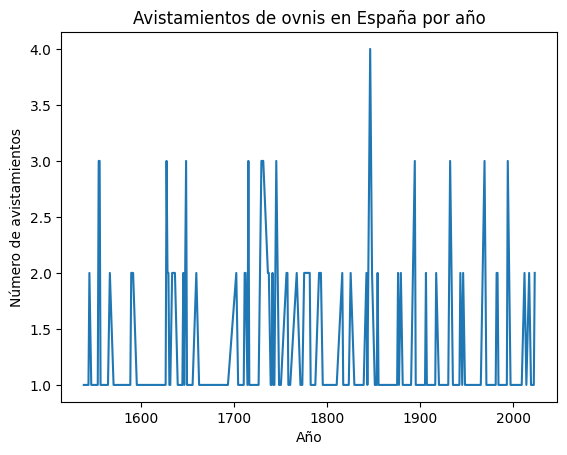

In [7]:
# Creamos gráfico de líneas
#sns.set_style("darkgrid")
sns.lineplot(data=df_group_by_year, x='year', y='sightings')
plt.title('Avistamientos de ovnis en España por año')
plt.xlabel('Año')
plt.ylabel('Número de avistamientos')
plt.show()

Vemos que en España no es muy elevado este tipo de fenómenos. También vemos que el año que más avistamientos se produjeron, el número de avistamientos fue 4. Por último, podemos deducir que este tipo de fenómenos, al menos en España, no se han visto incrementados por la aparición de tecnologías como cámaras de fotos, cámaras de vídeo o smartphones.

Sin emargo, aunque el gráfico no está mal y es justamente lo que queríamos representar, no es interactivo. Como ya he comentado, python posee un gran número de librerías y, hay librerías como Plotty, que permiten la creación de gráficos interactivos. Vamos a hacer uso de ella para crear un gráfico interactivo. 

In [8]:
# Import de Plotty
import plotly.express as pe

In [9]:
# Creando y mostrando el gráfico de avistamientos por año interactivo
interactive_sightings_by_year_fig = pe.line(df_group_by_year, x='year', y='sightings', title='Número de avistamientos de ovnis en España por año')
interactive_sightings_by_year_fig.update_xaxes(title_text='Año')
interactive_sightings_by_year_fig.update_yaxes(title_text='Número de avistamientos')
interactive_sightings_by_year_fig.show()

Con los controles que hay en la parte superior derecha del gráfico puedes hacer zoom, desplazarte, etc., es decir, puedes interacturar con el gráfico. Además, si seleccionas un area del gráfico hará automáticamente "Zoom In" en esa área. A pesar de ser el mismo gráfico que el que se ha creado con Seaborn, el gráfico creado con Plotty ofrece muchas más posibilidades.

# Ubicación de los avistamientos

Para graficar la ubicación de los avistamientos, haremos uso de la librería Folium. Esta librería se dió en clase y nos ayudará, gracias a la latitud y longitud que tenemos en cada registro, a graficar la ubicación de los avistamientos.

In [10]:
# Importando folium
import folium

In [15]:
# Creamos y centramos mapa
sightings_ubic_fig = folium.Map(location=[41.7604900, -0.0696600], zoom_start=6.5)

# Añadimos marcador de cada avistamiento
for index, row in spain_ufo_sightings.iterrows():
  folium.Marker(location=[row['latitude'], row['longitude']], popup=row['year']).add_to(sightings_ubic_fig)

# Mostramos el mapa con los marcadores de cada avistamiento
display(sightings_ubic_fig)

Por último, vamos a preparar el conjunto de datos para los siguientes gráficos que haremos con Power BI.

In [12]:
# Preparando conjunto de datos para los siguientes gráficos
spain_ufo_sightings['Cow incidents'] = spain_ufo_sightings['Cow incidents'].map({'No': 0, 'Yes': 1})
spain_ufo_sightings['Crop circle found'] = spain_ufo_sightings['Crop circle found'].map({'No': 0, 'Yes': 1})
spain_ufo_sightings['Alien sighted'] = spain_ufo_sightings['Alien sighted'].map({'No': 0, 'Yes': 1})
spain_ufo_sightings['Abduction event'] = spain_ufo_sightings['Abduction event'].map({'No': 0, 'Yes': 1})
spain_ufo_sightings['sighting_level'] = spain_ufo_sightings[['Cow incidents', 'Crop circle found', 'Alien sighted', 'Abduction event']].sum(axis=1)
spain_ufo_sightings['lat_lon'] = spain_ufo_sightings['latitude'].astype(str).str.cat(spain_ufo_sightings['longitude'].astype(str), sep=',')

In [13]:
# Mostramos conjunto de datos con las transformaciones
spain_ufo_sightings

,longitude,latitude,year,Cow incidents,Crop circle found,Alien sighted,Abduction event,sighting_level,lat_lon
0,-5.589385,42.482207,1915,1,0,0,0,1,"42.48220686692536,-5.589384600026233"
1,-8.021037,43.018699,1599,1,0,0,0,1,"43.01869917340454,-8.021037490382781"
2,-7.536301,42.233816,1923,1,0,0,0,1,"42.23381611100798,-7.536300927825104"
3,-4.288818,42.106205,1576,1,0,0,0,1,"42.10620533032481,-4.288818279589694"
4,-6.496170,42.212547,1786,1,0,0,0,1,"42.21254655263939,-6.496170376257829"
...,...,...,...,...,...,...,...,...,...
275,-2.984226,38.129384,1853,0,1,1,1,3,"38.12938415173871,-2.98422614230956"
276,-2.223036,38.337168,1645,0,1,1,1,3,"38.33716784178434,-2.223036343039762"
277,-2.392218,37.995160,1937,0,0,1,0,1,"37.99516028545941,-2.392218341288648"
278,-2.454239,38.063602,1956,0,0,1,1,2,"38.06360182663702,-2.45423909863087"


In [14]:
# Pasamos conjunto de datos a CSV para poder descargarlo
spain_ufo_sightings.to_csv("spain_ufo_sightings.csv", index=False)